In [ ]:
#pip install pandas numpy scikit-learn statsmodels
#pip install pandas scikit-learn
#pip install statsmodels



In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 22.4 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools


In [ ]:

df_inventory = pd.read_csv('Zillow_data/for_sale_inventory.csv')
df_forecasts = pd.read_csv('Zillow_data/forecasts.csv')
df_sold_above = pd.read_csv('Zillow_data/home_sold_above.csv')
df_home_value = pd.read_csv('Zillow_data/home_value.csv')
df_days_to_close = pd.read_csv('Zillow_data/mean_days_to_close.csv')
df_sale_to_list = pd.read_csv('Zillow_data/median_sale_to_list.csv')
df_new_list = pd.read_csv('Zillow_data/new_listings.csv')
df_price_cut = pd.read_csv('Zillow_data/price_cut.csv')

# Get the total number of missing values in each DataFrame
total_missing_inventory = df_inventory.isna().sum().sum()
total_missing_forecasts = df_forecasts.isna().sum().sum()
total_missing_sold_above = df_sold_above.isna().sum().sum()
total_missing_home_value = df_home_value.isna().sum().sum()
total_missing_days_to_close = df_days_to_close.isna().sum().sum()
total_missing_sale_to_list = df_sale_to_list.isna().sum().sum()
total_missing_new_list = df_new_list.isna().sum().sum()
total_missing_price_cut = df_price_cut.isna().sum().sum()


print("Total missing values in for_sale_inventory.csv:", total_missing_inventory)
print("Total missing values in forecasts.csv:", total_missing_forecasts)
print("Total missing values in home_sold_above.csv:", total_missing_sold_above)
print("Total missing values in home_value.csv:", total_missing_home_value)
print("Total missing values in mean_days_to_close.csv:", total_missing_days_to_close)
print("Total missing values in median_sale_to_list.csv:", total_missing_sale_to_list)
print("Total missing values in new_listings.csv:", total_missing_new_list)
print("Total missing values in price_cut.csv:", total_missing_price_cut)

print(df_inventory.columns)
print(df_forecasts.columns)
print(df_sold_above.columns)
print(df_home_value.columns)
print(df_days_to_close.columns)
print(df_sale_to_list.columns)
print(df_new_list.columns)
print(df_price_cut.columns)


Total missing values in for_sale_inventory.csv: 1190
Total missing values in forecasts.csv: 1
Total missing values in home_sold_above.csv: 10592
Total missing values in home_value.csv: 49272
Total missing values in mean_days_to_close.csv: 10524
Total missing values in median_sale_to_list.csv: 10489
Total missing values in new_listings.csv: 2642
Total missing values in price_cut.csv: 1530
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
       '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31'

I filtered out rows with 'RegionType' equal to 'country' from a list of DataFrames,  keeping only regional data in each DataFrame.

In [ ]:


dataframes = [df_inventory, df_forecasts, df_sold_above, df_home_value,
              df_days_to_close, df_sale_to_list, df_new_list, df_price_cut]

for i, df in enumerate(dataframes):
    dataframes[i] = df[df['RegionType'] != 'country']

df_inventory, df_forecasts, df_sold_above, df_home_value, df_days_to_close, df_sale_to_list, df_new_list, df_price_cut = dataframes


I conducted data cleaning by removing rows with over 5 missing values and then performed linear interpolation for missing data between columns in each DataFrame. The cleaned and interpolated DataFrames were printed and reassigned to the original variables for further analysis.

In [ ]:



for i, df in enumerate(dataframes):
    # Remove rows with more than 5 missing values
    df_cleaned = df.dropna(thresh=df.shape[1] - 5)

    # Interpolate missing values between columns
    df_cleaned = df_cleaned.interpolate(method='linear', axis=0)
    
    # Update the original DataFrame with cleaned and interpolated data
    dataframes[i] = df_cleaned

    print("DataFrame:", df.columns)
    print(df_cleaned)
    print("=" * 50)

# Assign back to the original DataFrame variables
df_inventory, df_forecasts, df_sold_above, df_home_value, df_days_to_close, df_sale_to_list, df_new_list, df_price_cut = dataframes


DataFrame: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
       '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
       '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
       '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
       '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-0

In [ ]:


for df in dataframes:
    
    print("Shape:", df.shape)
    print("=" * 50)



Shape: (899, 69)
Shape: (894, 9)
Shape: (299, 68)
Shape: (431, 287)
Shape: (300, 68)
Shape: (300, 68)
Shape: (865, 69)
Shape: (889, 69)


I identified and filtered out rows with common 'RegionName' values across multiple DataFrames, ensuring consistency. The modified DataFrames were then printed, displaying the columns and data, followed by reassignment of the filtered DataFrames to their original variables.

In [ ]:
# Find common 'RegionName' values across all DataFrames
common_region_names = set(dataframes[0]['RegionName'])
for df in dataframes[1:]:
    common_region_names &= set(df['RegionName'])

# Filter each DataFrame to keep only rows with common 'RegionName'
for i, df in enumerate(dataframes):
    dataframes[i] = df[df['RegionName'].isin(common_region_names)]

for df in dataframes:
    print("DataFrame:", df.columns)
    print(df)
    print("=" * 50)

df_inventory, df_forecasts, df_sold_above, df_home_value, df_days_to_close, df_sale_to_list, df_new_list, df_price_cut = dataframes


DataFrame: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
       '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
       '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
       '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
       '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-0

Combined selected columns from different DataFrames into a single merged DataFrame, avoiding column name conflicts by renaming and differentiating the columns based on their sources. The resulting merged_data DataFrame displays 'RegionName' and '2023-05-31' columns from each source DataFrame with unique suffixes.

In [ ]:

# Create a list containing all the data frames.
dataframes = [df_inventory, df_sold_above, df_home_value,
              df_days_to_close, df_sale_to_list, df_new_list, df_price_cut]

# Select the 'RegionName' and '2023-05-31' columns from each data frame.
selected_columns = ['RegionName', '2023-05-31']

# Merge the data frames by connecting them based on the 'RegionName' column.
merged_data = dataframes[0][selected_columns]
for df in dataframes[1:]:
    df_selected = df[selected_columns]
    merged_data = pd.merge(merged_data, df_selected, on='RegionName')

# Rename the date columns to avoid column name conflicts.
merged_data.rename(columns={col: f'{col}_1' for col in selected_columns[1:]}, inplace=True)

# Rename the columns after merging.
column_suffixes = ['inventory', 'soldabove', 'homevalue', 
                   'daystoclose', 'saletolist', 'newlist', 'pricecut']

for i, suffix in enumerate(column_suffixes):
    for col in selected_columns[1:]:
        new_col_name = f'{suffix}_{col}'
        merged_data.rename(columns={f'{col}_1': new_col_name}, inplace=True)



In [ ]:


new_column_names = ['inventory_May', 'soldabove_May', 'homevalue_May', 
                    'daystoclose_May', 'saletolist_May', 'newlist_May', 'pricecut_May']

# Rename the column names to the new column names.
merged_data.columns = ['RegionName'] + new_column_names


print(merged_data)


                   RegionName  inventory_May  soldabove_May  homevalue_May  \
0                New York, NY        45829.0       0.442631  608086.786180   
1             Los Angeles, CA        15283.0       0.487336  885062.616490   
2                 Chicago, IL        22091.0       0.442144  303179.822673   
3                  Dallas, TX        19987.0       0.327508  374973.053827   
4                 Houston, TX        21590.0       0.233927  305697.922596   
..                        ...            ...            ...            ...   
210             St. Marys, GA          216.0       0.283094  276524.615510   
211                Payson, AZ          307.0       0.111337  360923.290654   
212               Newport, OR          355.0       0.190721  497942.121397   
213  Gardnerville Ranchos, NV          244.0       0.193610  637936.556014   
214      Kill Devil Hills, NC          349.0       0.295347  565833.278321   

     daystoclose_May  saletolist_May  newlist_May  pricecut_May

In [ ]:
df_home_value = df_home_value.reset_index(drop=True)
merged_data['homevalue_Jun'] = df_home_value['2023-06-30']

In [ ]:
print(merged_data.head(4))

        RegionName  inventory_May  soldabove_May  homevalue_May  \
0     New York, NY        45829.0       0.442631  608086.786180   
1  Los Angeles, CA        15283.0       0.487336  885062.616490   
2      Chicago, IL        22091.0       0.442144  303179.822673   
3       Dallas, TX        19987.0       0.327508  374973.053827   

   daystoclose_May  saletolist_May  newlist_May  pricecut_May  homevalue_Jun  
0             53.0        0.999958      14259.0      0.121972  613275.820652  
1             30.0        1.000798       6452.0      0.138675  893045.409107  
2             38.0        1.000000      10015.0      0.172739  305698.312728  
3             29.0        0.998652       8835.0      0.246466  376025.512105  


Calculated the correlation coefficient matrix among these variables, and then visualized the correlation coefficients using a heatmap plot with annotations. 
I created and visualized a heatmap of the correlation coefficients between the chosen variables to understand their relationships and potential dependencies.

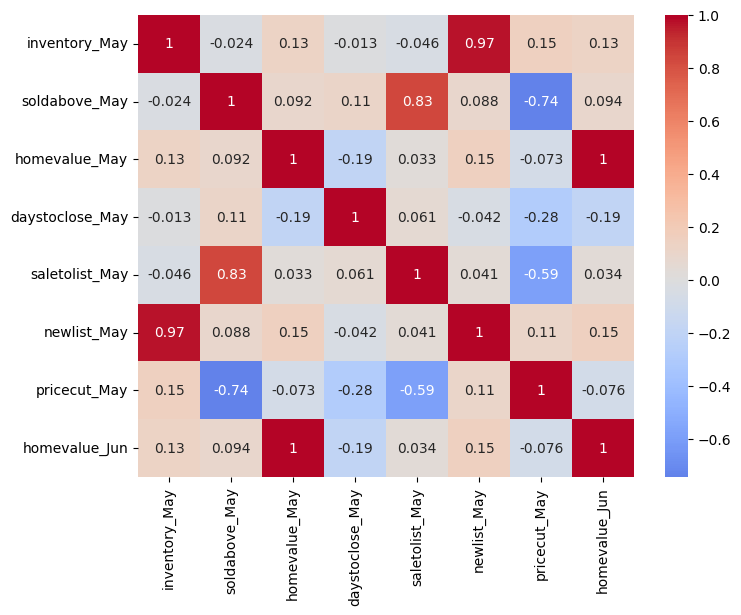

In [ ]:


variables = ['inventory_May', 'soldabove_May', 'homevalue_May', 
                    'daystoclose_May', 'saletolist_May', 'newlist_May', 'pricecut_May','homevalue_Jun']


data_for_heatmap = merged_data[variables]

# Calculate the correlation coefficient matrix.
correlation_matrix = data_for_heatmap.corr()


plt.figure(figsize=(8, 6))

# Plot a heatmap of the correlation coefficient matrix.

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


plt.show()


In [ ]:
print(correlation_matrix)

                 inventory_May  soldabove_May  homevalue_May  daystoclose_May  \
inventory_May         1.000000      -0.023511       0.134799        -0.012812   
soldabove_May        -0.023511       1.000000       0.091861         0.112147   
homevalue_May         0.134799       0.091861       1.000000        -0.187439   
daystoclose_May      -0.012812       0.112147      -0.187439         1.000000   
saletolist_May       -0.045839       0.831710       0.032761         0.060579   
newlist_May           0.968264       0.088222       0.154000        -0.041977   
pricecut_May          0.150516      -0.742461      -0.072813        -0.281502   
homevalue_Jun         0.134185       0.093952       0.999982        -0.185639   

                 saletolist_May  newlist_May  pricecut_May  homevalue_Jun  
inventory_May         -0.045839     0.968264      0.150516       0.134185  
soldabove_May          0.831710     0.088222     -0.742461       0.093952  
homevalue_May          0.032761     0.1540

1. Inventory (inventory_May) and Home Values (homevalue_May, homevalue_Jun): There is a strong positive correlation between inventory in May and home values in both May and June. This suggests that areas with higher inventory levels in May tend to have higher home values.

2. Sold Above Listing Price (soldabove_May) and Days to Close (daystoclose_May): There is a weak positive correlation between homes sold above listing price in May and the number of days it takes to close a sale. This might indicate that homes sold above the listing price may take slightly longer to close.

3. Sale to List Ratio (saletolist_May) and Sold Above Listing Price (soldabove_May): There is a strong positive correlation between the sale to list ratio in May and homes sold above the listing price. This suggests that areas with higher sale to list ratios tend to have more homes sold above the listing price.

4. New Listings (newlist_May) and Inventory (inventory_May): There is a strong positive correlation between new listings in May and inventory in May. This implies that areas with more new listings also tend to have higher inventory levels.

5. Price Cuts (pricecut_May) and Sold Above Listing Price (soldabove_May): There is a weak negative correlation between price cuts in May and homes sold above the listing price. This might indicate that areas with more price cuts have fewer homes sold above the listing price.

Created a scatter plot to visually understand the relationship between 'Inventory in May' and 'Home Values in May' for different regions.

I observed that there seems to be a slightly positive linear trend between inventory levels and home values. This suggests that regions with higher inventory levels in May tend to have slightly higher home values in the same month. However, the relationship appears to be relatively weak, and there is a wide spread of data points, indicating some variability in this relationship among different regions.

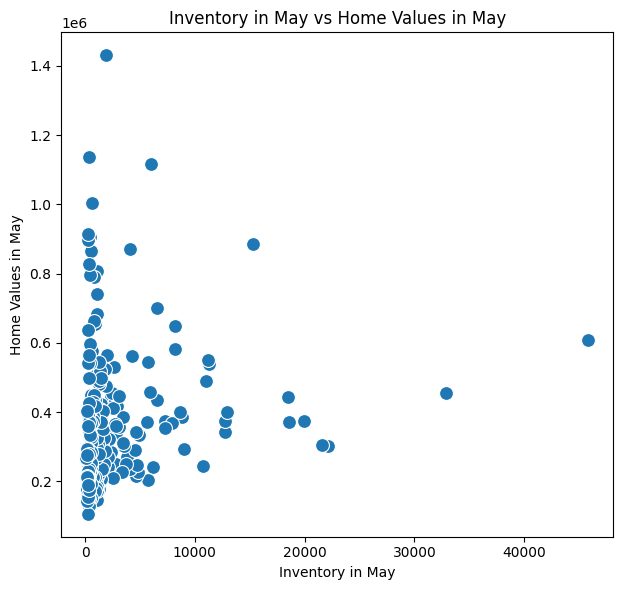

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='inventory_May', y='homevalue_May', data=merged_data, s=100)
plt.title('Inventory in May vs Home Values in May')
plt.xlabel('Inventory in May')
plt.ylabel('Home Values in May')

plt.tight_layout()
plt.show()



In this scatter plot with a linear regression line, I explored the relationship between the percentage of homes sold above their listing price in May ('Sold Above Listing Price (May)') and the number of days it takes for homes to close in May ('Days to Close (May)').
As the percentage of homes sold above listing price increases, the number of days to close also tends to increase, indicating that homes with higher percentages of selling above listing price may take longer to close.

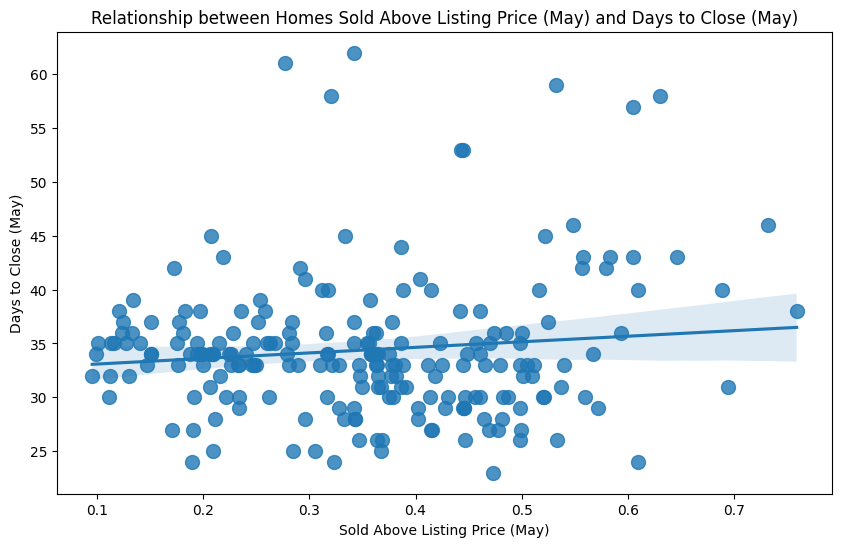

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(x='soldabove_May', y='daystoclose_May', data=merged_data, scatter_kws={'s': 100})
plt.title('Relationship between Homes Sold Above Listing Price (May) and Days to Close (May)')
plt.xlabel('Sold Above Listing Price (May)')
plt.ylabel('Days to Close (May)')
plt.show()

The relationship between the sale-to-list ratio of homes in May ('Sale to List Ratio (May)') and the percentage of homes sold above their listing price in May ('Homes Sold Above Listing Price (May)'). The plot suggests that there is a strong positive correlation between these two variables, indicating that higher sale-to-list ratios may be associated with a higher percentage of homes being sold above their listing price.

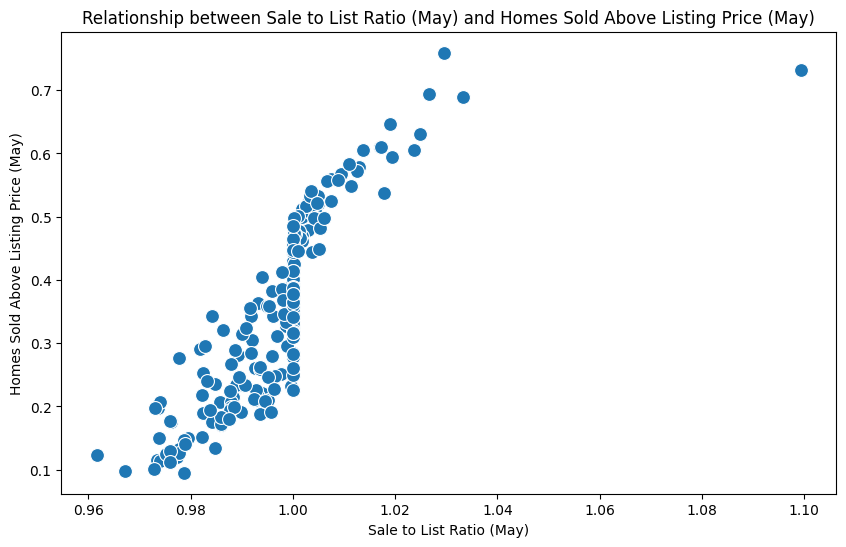

In [ ]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='saletolist_May', y='soldabove_May', data=merged_data, s=100)
plt.title('Relationship between Sale to List Ratio (May) and Homes Sold Above Listing Price (May)')
plt.xlabel('Sale to List Ratio (May)')
plt.ylabel('Homes Sold Above Listing Price (May)')
plt.show()

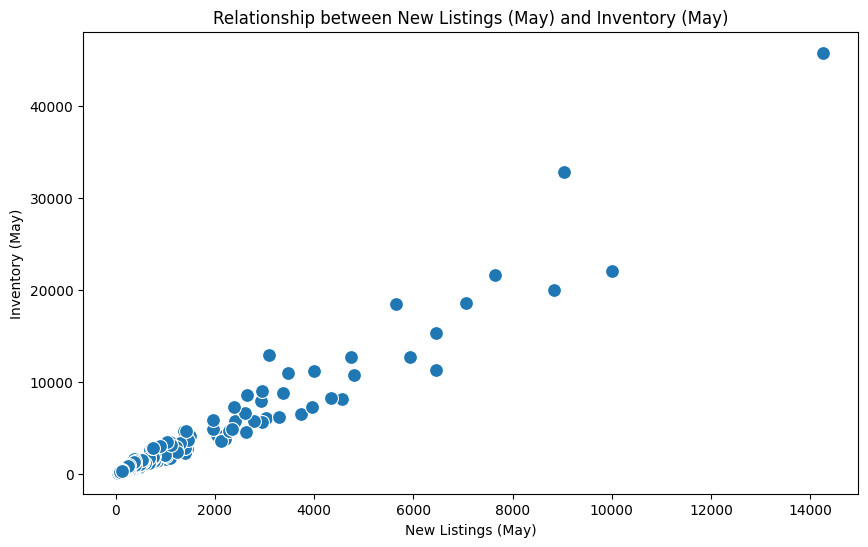

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='newlist_May', y='inventory_May', data=merged_data, s=100)
plt.title('Relationship between New Listings (May) and Inventory (May)')
plt.xlabel('New Listings (May)')
plt.ylabel('Inventory (May)')
plt.show()

This scatter plot reveals a significant negative correlation between the number of price cuts in May ('Price Cuts (May)') and the count of homes sold above the listing price in May ('Homes Sold Above Listing Price (May)'). In other words, as the number of price cuts increases, there is a tendency for fewer homes to be sold above the listing price.

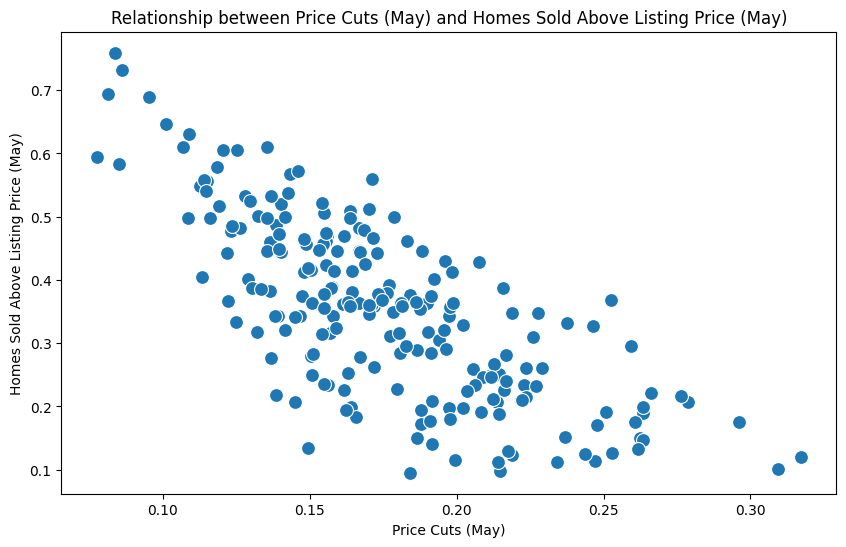

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pricecut_May', y='soldabove_May', data=merged_data, s=100)
plt.title('Relationship between Price Cuts (May) and Homes Sold Above Listing Price (May)')
plt.xlabel('Price Cuts (May)')
plt.ylabel('Homes Sold Above Listing Price (May)')
plt.show()


In [ ]:
df_home_value = pd.read_csv('Zillow_data/home_value.csv')

In [ ]:
dataframes = [df_inventory, df_forecasts, df_sold_above, df_home_value,
              df_days_to_close, df_sale_to_list, df_new_list, df_price_cut]

for i, df in enumerate(dataframes):
    # Remove rows with more than 5 missing values
    df_cleaned = df.dropna(thresh=df.shape[1] - 5)

    # Interpolate missing values between columns
    df_cleaned = df_cleaned.interpolate(method='linear', axis=0)
    
    # Update the original DataFrame with cleaned and interpolated data
    dataframes[i] = df_cleaned


# Assign back to the original DataFrame variables
df_inventory, df_forecasts, df_sold_above, df_home_value, df_days_to_close, df_sale_to_list, df_new_list, df_price_cut = dataframes

In [ ]:
df_home_value = df_home_value.drop(index=0)


Selected columns from the DataFrame df_home_value that have dates starting from January 2013 or later. And then created a new DataFrame named filtered_df containing only the selected columns. After that, dropped specific columns ('RegionID', 'SizeRank', 'RegionType') from the filtered_df DataFrame. The finnal filtered_df DataFrame, which contains the desired columns for analysis, starting from January 2013.

In [ ]:


# Select columns to keep
columns_to_keep = [col for col in df_home_value.columns if col >= '2013-01-31']

# Create a new DataFrame with selected columns
filtered_df = df_home_value[columns_to_keep].copy()

# Drop specified columns
columns_to_drop = ['RegionID', 'SizeRank', 'RegionType']
filtered_df.drop(columns=columns_to_drop, inplace=True)




Filtered and plotted home value trends for different regions in New York. "New York" at the top, followed by "Hudson," "Lingston," "Ithaca," and "Albany," indicating that these regions have the highest home values among the plotted regions in New York.

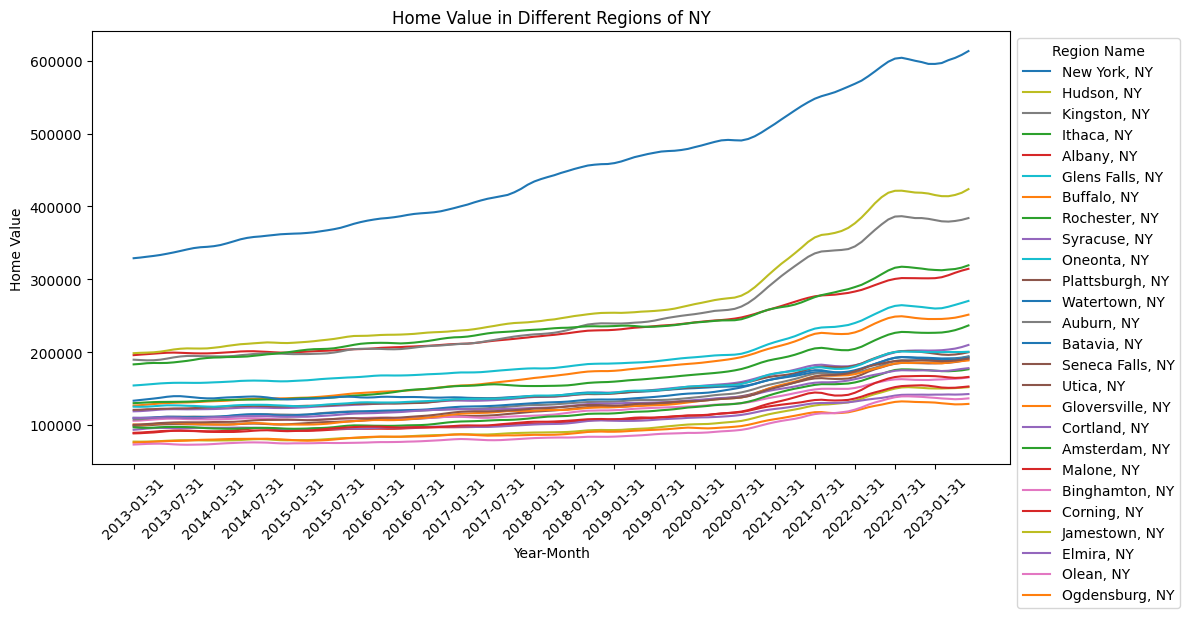

In [ ]:
ny_data = filtered_df[filtered_df['StateName'] == 'NY']

# List of RegionNames in NY
region_names = ny_data['RegionName'].unique()

plt.figure(figsize=(12, 6))
handles = []

for region_name in region_names:
    region_data = ny_data[ny_data['RegionName'] == region_name]
    line, = plt.plot(region_data.columns[2:], region_data.iloc[0, 2:], label=region_name)
    handles.append(line)

plt.title('Home Value in Different Regions of NY')
plt.xlabel('Year-Month')
plt.ylabel('Home Value')
plt.xticks(rotation=45)

# Choose every n-th label to display
n = 6
plt.xticks(np.arange(0, len(region_data.columns[2:]), n), region_data.columns[2::n])

# Create a legend and sort handles based on home value
sorted_handles = sorted(handles, key=lambda line: ny_data[ny_data['RegionName'] == line.get_label()].iloc[0, -1], reverse=True)
sorted_labels = [h.get_label() for h in sorted_handles]

plt.legend(handles=sorted_handles, labels=sorted_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Region Name')

plt.tight_layout()
plt.show()




I transposed the dataset to reformat it with dates as rows and different regions as columns. This transformation allowed for a clearer representation of the temporal trends. 

In [ ]:


# Transpose the DataFrame and set 'RegionName' and 'StateName' as index
transposed_data = ny_data.set_index(['RegionName']).T


transposed_data.index.name = 'Date'


transposed_data = transposed_data.drop(transposed_data.index[0])
ts_df = transposed_data

ts = pd.to_numeric(transposed_data['New York, NY'], errors='coerce')

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2021-05-31'),
  Text(1, 0, '2021-06-30'),
  Text(2, 0, '2021-07-31'),
  Text(3, 0, '2021-08-31'),
  Text(4, 0, '2021-09-30'),
  Text(5, 0, '2021-10-31'),
  Text(6, 0, '2021-11-30'),
  Text(7, 0, '2021-12-31'),
  Text(8, 0, '2022-01-31'),
  Text(9, 0, '2022-02-28'),
  Text(10, 0, '2022-03-31'),
  Text(11, 0, '2022-04-30'),
  Text(12, 0, '2022-05-31'),
  Text(13, 0, '2022-06-30'),
  Text(14, 0, '2022-07-31'),
  Text(15, 0, '2022-08-31'),
  Text(16, 0, '2022-09-30'),
  Text(17, 0, '2022-10-31'),
  Text(18, 0, '2022-11-30'),
  Text(19, 0, '2022-12-31'),
  Text(20, 0, '2023-01-31'),
  Text(21, 0, '2023-02-28'),
  Text(22, 0, '2023-03-31'),
  Text(23, 0, '2023-04-30'),
  Text(24, 0, '2023-05-31'),
  Text(25, 0, '2023-06-30')])

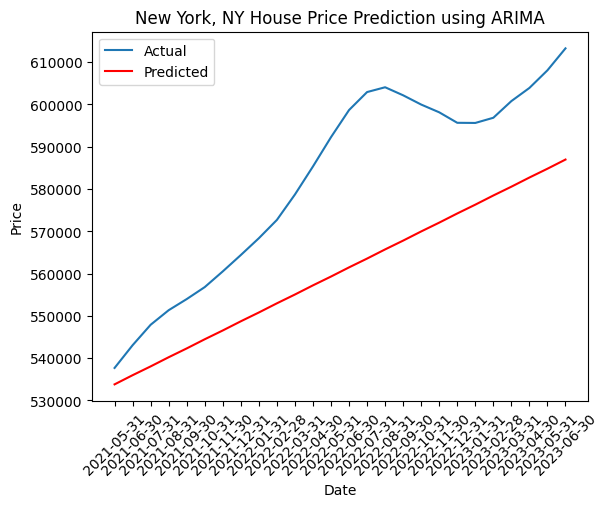

In [ ]:


#This cell is just for test if the plot is showinng 

# Extract the 'New York, NY' column from transposed_data and convert it to numeric

# Split the data into training and testing sets
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Create an ARIMA model
# p: AR (AutoRegressive) order, d: differencing order, q: MA (Moving Average) order
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

# Forecast the test set
predictions = model_fit.forecast(steps=len(test))

# Calculate the Mean Squared Error
mse = mean_squared_error(test, predictions)
#print(f'Mean Squared Error: {mse}')

# Convert the index to a list
test_index = test.index.tolist()

# Plot the original data and predicted results
plt.plot(test_index, test.values, label='Actual')
plt.plot(test_index, predictions, color='red', label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('New York, NY House Price Prediction using ARIMA')

plt.xticks(rotation=45)

#plt.show()




The following codes generates a visual representation of home value predictions for the six regions with the highest home values in New York. It begins by creating a grid of subplots to accommodate the visualizations. The regions are sorted based on their home values in June, and the top six are selected for analysis. For each region, an ARIMA model is constructed to forecast future home values, with optimal (p, d, q) parameters determined through a grid search to minimize mean squared error. The actual and predicted home values are then plotted in separate subplots, each labeled with the region's name and the best ARIMA parameters. This presentation offers an insightful view into the forecasted trends of the real estate market in New York's most valuable regions.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, f

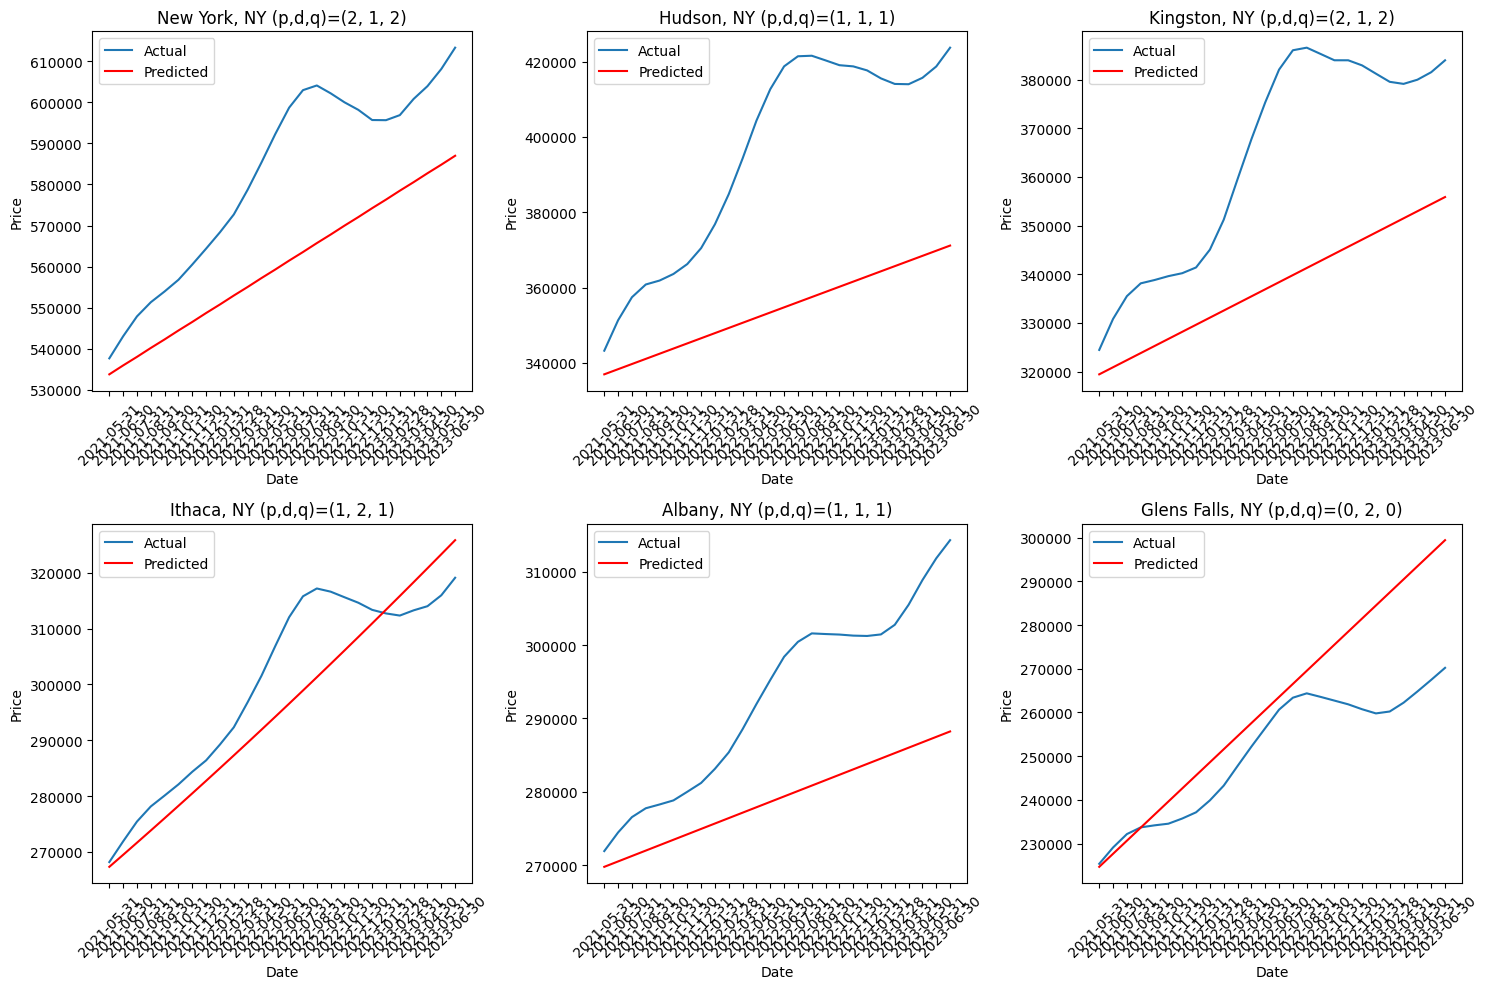

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sort regions by highest home value in June and select the top 6
top_regions = ny_data.sort_values(by='2023-06-30', ascending=False)['RegionName'].head(6)

# Loop through the top 6 regions and populate subplots
for idx, region in enumerate(top_regions):
    # Extract the region's column from transposed_data and convert it to numeric
    ts = pd.to_numeric(transposed_data[region], errors='coerce')

    # Split the data into training and testing sets
    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]

    # Grid search for best (p, d, q) parameters
    p_values = range(0, 3)
    d_values = range(1, 3)
    q_values = range(0, 3)
    best_mse = float("inf")
    best_params = None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(train, order=(p, d, q))
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test))
            mse = mean_squared_error(test, predictions)

            if mse < best_mse:
                best_mse = mse
                best_params = (p, d, q)
        except:
            continue

    print(f'Best ARIMA parameters for {region}: {best_params}')

    # Create the final ARIMA model using the best parameters
    final_model = ARIMA(train, order=best_params)
    final_model_fit = final_model.fit()

    # Forecast the test set
    predictions = final_model_fit.forecast(steps=len(test))

    # Convert the index to a list
    test_index = test.index.tolist()

    # Plot the original data and predicted results in the respective subplot
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    ax.plot(test_index, test.values, label='Actual')
    ax.plot(test_index, predictions, color='red', label='Predicted')
    ax.set_title(f'{region} (p,d,q)={best_params}')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


we will do the same thing for MI

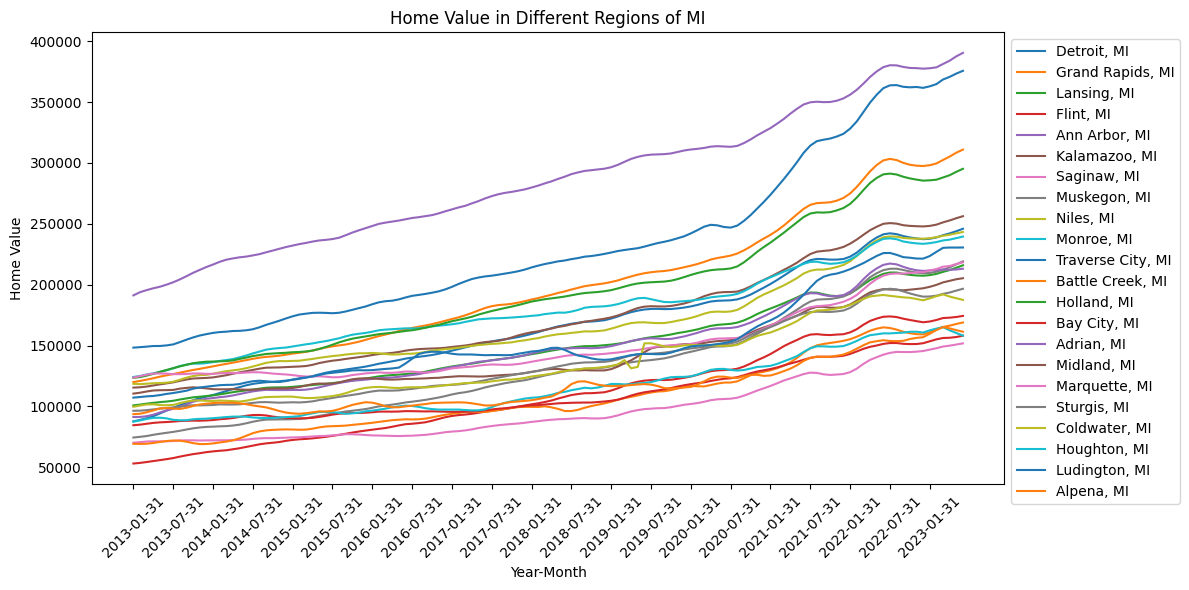

In [ ]:
mi_data = filtered_df[filtered_df['StateName'] == 'MI']

# List of RegionNames in MI
region_names = mi_data['RegionName'].unique()


plt.figure(figsize=(12, 6))

for region_name in region_names:
    region_data = mi_data[mi_data['RegionName'] == region_name]
    plt.plot(region_data.columns[2:], region_data.iloc[0, 2:], label=region_name)

plt.title('Home Value in Different Regions of MI')
plt.xlabel('Year-Month')
plt.ylabel('Home Value')
plt.xticks(rotation=45)

# Choose every n-th label to display
n = 6
plt.xticks(np.arange(0, len(region_data.columns[2:]), n), region_data.columns[2::n])


plt.ticklabel_format(style='plain', axis='y')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [ ]:


# Transpose the DataFrame and set 'RegionName' and 'StateName' as index
transposed_data = mi_data.set_index(['RegionName']).T


transposed_data.index.name = 'Date'


transposed_data = transposed_data.drop(transposed_data.index[0])
ts_df = transposed_data



/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, f

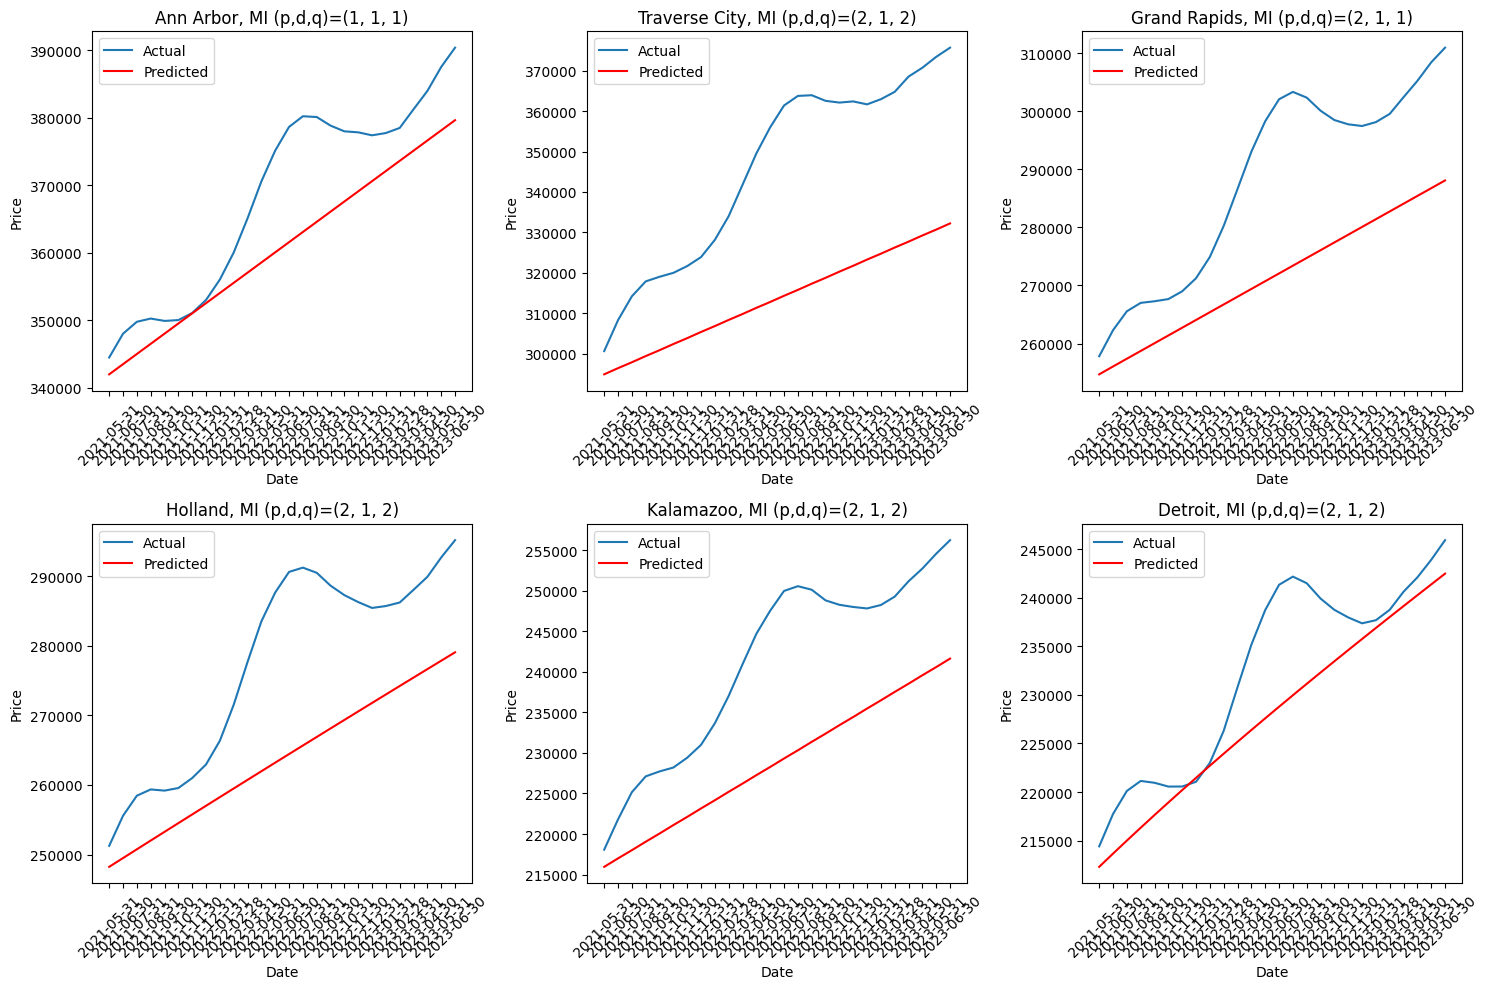

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sort regions by highest home value in June and select the top 6
top_regions = mi_data.sort_values(by='2023-06-30', ascending=False)['RegionName'].head(6)

# Loop through the top 6 regions and populate subplots
for idx, region in enumerate(top_regions):
    # Extract the region's column from transposed_data and convert it to numeric
    ts = pd.to_numeric(transposed_data[region], errors='coerce')

    # Split the data into training and testing sets
    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]

    # Grid search for best (p, d, q) parameters
    p_values = range(0, 3)
    d_values = range(1, 3)
    q_values = range(0, 3)
    best_mse = float("inf")
    best_params = None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(train, order=(p, d, q))
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test))
            mse = mean_squared_error(test, predictions)

            if mse < best_mse:
                best_mse = mse
                best_params = (p, d, q)
        except:
            continue

    print(f'Best ARIMA parameters for {region}: {best_params}')

    # Create the final ARIMA model using the best parameters
    final_model = ARIMA(train, order=best_params)
    final_model_fit = final_model.fit()

    # Forecast the test set
    predictions = final_model_fit.forecast(steps=len(test))

    # Convert the index to a list
    test_index = test.index.tolist()

    # Plot the original data and predicted results in the respective subplot
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    ax.plot(test_index, test.values, label='Actual')
    ax.plot(test_index, predictions, color='red', label='Predicted')
    ax.set_title(f'{region} (p,d,q)={best_params}')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

I tried the regression models combining some of the features but the result was really bad with low r-square value and high mean square Error. but I will leave the code here for the reference.



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



#selected features
features = ['newlist_May', 'inventory_May', 'daystoclose_May']


X = merged_data[features]
y = df_home_value['2023-06-30']

#scale the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#trainn test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#model setting 
model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)




from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

features = ['newlist_May', 'inventory_May', 'daystoclose_May', 'homevalue_May']

X = merged_data[features]
y = df_home_value['2023-06-30']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print("Random Forest Regression Model:")
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R-Squared:", r2_rf)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1505a271-4c8a-4bdc-ab81-1d267b92f3bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>